In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score

In [3]:
np.set_printoptions(suppress=True)

## Data Loading

In [4]:
# Load mixture of experts data
moe_data = pd.read_csv("data/autism_predictions.csv", sep=";")
moe_X = moe_data[['linear', 'clinical', 'nn']]
moe_y = moe_data[['true']]

moe_x_train, moe_x_test, moe_y_train, moe_y_test = train_test_split(moe_X, moe_y, test_size=.2, random_state=42)

In [5]:
# Load general data
orig_train_data = pd.read_csv("data/train.csv")
orig_test_data = pd.read_csv("data/test.csv")

scores = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

orig_x_train = orig_train_data[scores].astype(np.float32)
orig_y_train = orig_train_data["Class/ASD"].values.astype(np.float32)

orig_x_test = orig_test_data[scores].astype(np.float32)
orig_y_test = (orig_test_data["austim"].values == "yes").astype(np.float32)

## Model Fitting

In [6]:
# Generate and fit model over MOE data
moe_rfc = RandomForestClassifier(random_state=42)
moe_rfc.fit(moe_x_train, moe_y_train)

/Users/chris/anaconda3/envs/behavioral-data-science/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [7]:
# Generate and fit model over original data
orig_rfc = RandomForestClassifier(random_state=42)
orig_rfc.fit(orig_x_train, orig_y_train)

RandomForestClassifier(random_state=42)

In [8]:

# Predict the Test set results
moe_y_pred = moe_rfc.predict(moe_x_test)
orig_y_pred = orig_rfc.predict(orig_x_test)


In [21]:
print(sum(moe_y["true"]))

190.0


In [25]:
# Report accuracy
base_rate = 1 - sum(moe_y["true"]) / len(moe_y["true"])
print(f"Base rate: {base_rate}")
print('MOE model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(moe_y_test, moe_y_pred)))
print('General model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(orig_y_test, orig_y_pred)))

Base rate: 0.81
MOE model accuracy score with 10 decision-trees : 0.8800
General model accuracy score with 10 decision-trees : 0.8050


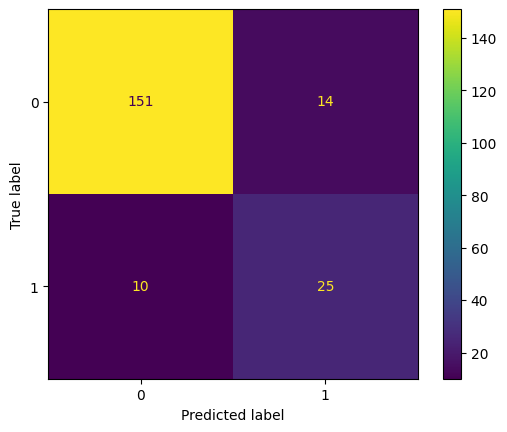

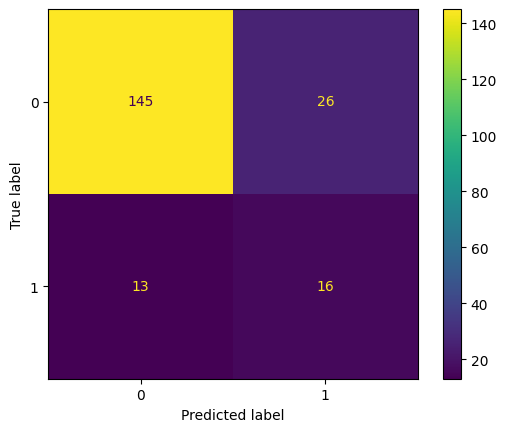

In [40]:
# Generate confusion matrices
moe_cm = confusion_matrix(moe_y_test, moe_y_pred)
moe_display = ConfusionMatrixDisplay(moe_cm)

orig_cm = confusion_matrix(orig_y_test, orig_y_pred)
orig_display = ConfusionMatrixDisplay(orig_cm)

moe_display.plot()
orig_display.plot()